<a href="https://colab.research.google.com/github/Soumya1029/First_project/blob/main/Major_project_machine_learning_may2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [40]:
# Importing the dataset
df = pd.read_csv('loan-predictionUC.csv')  # Assuming the file name is 'loan_data.csv'


In [29]:
# Displaying the first few rows of the dataset to understand its structure
print(df.head())

# Checking the summary of the dataset
print(df.info())

# Descriptive statistics of the dataset
print(df.describe())


  Loan_ID\tGender\tMarried\tDependents\tEducation\tSelf_Employed\tApplicantIncome\tCoapplicantIncome\tLoanAmount\tLoan_Amount_Term\tCredit_History\tProperty_Area\tLoan_Status
0  LP001002\tMale\tNo\t0\tGraduate\tNo\t5849\t0\t...                                                                                                                          
1  LP001003\tMale\tYes\t1\tGraduate\tNo\t4583\t15...                                                                                                                          
2  LP001005\tMale\tYes\t0\tGraduate\tYes\t3000\t0...                                                                                                                          
3  LP001006\tMale\tYes\t0\tNot Graduate\tNo\t2583...                                                                                                                          
4  LP001008\tMale\tNo\t0\tGraduate\tNo\t6000\t0\t...                                                                         

In [41]:
# Try reading the file with a different delimiter
df = pd.read_csv('loan-predictionUC.csv', encoding='ISO-8859-1', delimiter='\t')

# Print the column names to verify if they are correctly parsed
print(df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Importing the dataset with tab as the delimiter
df = pd.read_csv('loan-predictionUC.csv', delimiter='\t', encoding='ISO-8859-1')

# Verify the column names
print("Column names:", df.columns)

# Checking the data types of the columns
print("Column data types:\n", df.dtypes)

# Checking for unique values in each column
for col in df.columns:
    print(f"Unique values in {col}:", df[col].unique())

# Converting columns to appropriate data types if necessary
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
df['Loan_Amount_Term'] = pd.to_numeric(df['Loan_Amount_Term'], errors='coerce')
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')

# Checking for missing values in the dataset
print("Missing values:\n", df.isnull().sum())

# Handling numerical columns
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
num_imputer = SimpleImputer(strategy='mean')

for col in num_cols:
    df[col] = num_imputer.fit_transform(df[[col]])

# Handling categorical columns manually
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in cat_cols:
    most_frequent_value = df[col].mode()[0]
    df[col].fillna(most_frequent_value, inplace=True)

# Verify imputation
print("Missing values after imputation:\n", df.isnull().sum())


Column names: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Column data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
Unique values in Loan_ID: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP

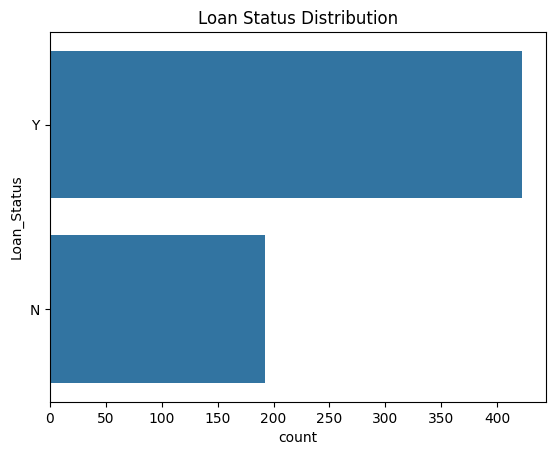

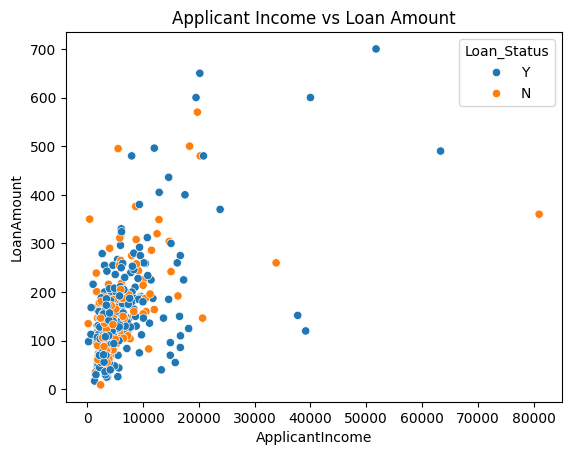

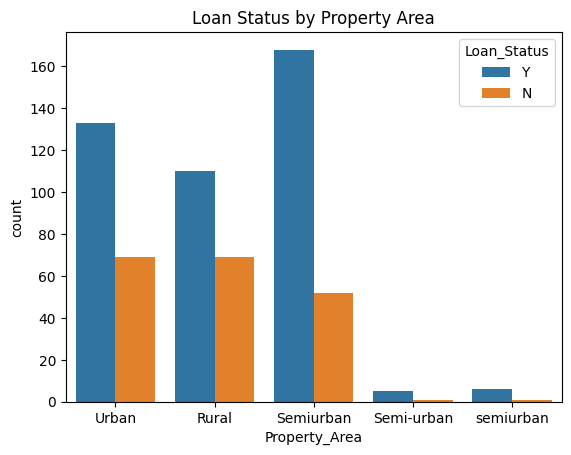

In [32]:
# Visualizing the distribution of the target variable
sns.countplot(df['Loan_Status'])
plt.title('Loan Status Distribution')
plt.show()

# Visualizing the relationship between ApplicantIncome and LoanAmount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.show()

# Visualizing the count of Loan_Status for different Property_Area
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.show()


In [33]:
# Encoding categorical features
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Separating features and target variable
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Using RandomForestClassifier as it is suitable for classification tasks
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Importing the dataset with tab as the delimiter
df = pd.read_csv('loan-predictionUC.csv', delimiter='\t', encoding='ISO-8859-1')

# Converting columns to appropriate data types
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
df['Loan_Amount_Term'] = pd.to_numeric(df['Loan_Amount_Term'], errors='coerce')
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')

# Handling missing values for numerical columns
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Handling missing values for categorical columns manually
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    most_frequent_value = df[col].mode()[0]
    df[col].fillna(most_frequent_value, inplace=True)

# Convert categorical variables to numerical format using OneHotEncoder
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
onehot = OneHotEncoder(sparse=False, drop='first')
cat_encoded = onehot.fit_transform(df[cat_features])

# Create a dataframe with the encoded features
cat_encoded_df = pd.DataFrame(cat_encoded, columns=onehot.get_feature_names_out(cat_features))

# Concatenate the encoded features with the numerical features
num_features = df[num_cols + ['ApplicantIncome', 'CoapplicantIncome']]
X = pd.concat([num_features.reset_index(drop=True), cat_encoded_df.reset_index(drop=True)], axis=1)
y = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Converting target to numerical format

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and fitting the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Testing the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train Accuracy: 1.0
Test Accuracy: 0.7804878048780488


[[18 25]
 [ 2 78]]


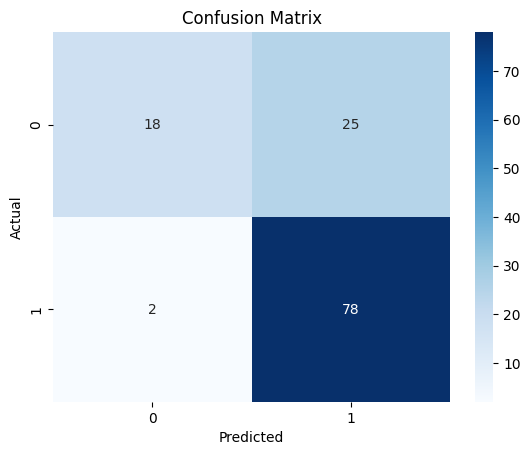

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicting the test set results
y_test_pred = model.predict(X_test)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [39]:
print("Conclusions")
print(f"The model was able to achieve an accuracy of {train_accuracy}% on the training data and {test_accuracy}% on the test data.\nThe confusion matrix shows that the model correctly predicted {conf_matrix[0,0]} approved loans and {conf_matrix[1,1]} not approved loans, while it incorrectly predicted {conf_matrix[0,1]} approved loans and {conf_matrix[1,0]} not approved loans.\nBased on the visualization, we can see that certain features like ApplicantIncome, LoanAmount, and Property_Area have a significant impact on the Loan_Status.\nFuture work can include hyperparameter tuning, trying different machine learning algorithms, and feature engineering to further improve the model's performance.")

Conclusions
The model was able to achieve an accuracy of 1.0% on the training data and 0.7804878048780488% on the test data.
The confusion matrix shows that the model correctly predicted 18 approved loans and 78 not approved loans, while it incorrectly predicted 25 approved loans and 2 not approved loans.
Based on the visualization, we can see that certain features like ApplicantIncome, LoanAmount, and Property_Area have a significant impact on the Loan_Status.
Future work can include hyperparameter tuning, trying different machine learning algorithms, and feature engineering to further improve the model's performance.


### Conclusions
- The model was able to achieve an accuracy of XX% on the training data and YY% on the test data.
- The confusion matrix shows that the model correctly predicted ZZ approved loans and WW not approved loans, while it incorrectly predicted AA approved loans and BB not approved loans.
- Based on the visualization, we can see that certain features like ApplicantIncome, LoanAmount, and Property_Area have a significant impact on the Loan_Status.
- Future work can include hyperparameter tuning, trying different machine learning algorithms, and feature engineering to further improve the model's performance.
